# Problem Set 6

##### Due November 11th 11:59pm

### Problem 1

<div>
<img src="problems/1.png" width="600">
</div>

C:\Users\adesr\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


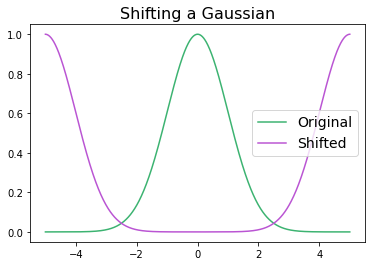

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def shift(arr, shift):
    N = len(arr)
    yft = np.fft.fft(arr)
    k = np.arange(len(yft))
    r = np.exp(2*np.pi*1J*k*shift/N)    
    yft_shift = yft*r 
    y_shift = np.fft.ifft(yft_shift)
    return y_shift

n = 1000
x = np.linspace(-5, 5, n)
y = np.exp(-0.5*x**2)
s = shift(y, n/2)

plt.figure(figsize=(6,4))
plt.title("Shifting a Gaussian", fontsize=16)
plt.plot(x,y, color='mediumseagreen', label='Original')
plt.plot(x,s, color='mediumorchid', label='Shifted')
plt.legend(fontsize=14)
plt.show()

This equation for r looks very similar to a DFT, except instead of x we have "shift", so when we multiply by our function in frequency space, we essentially just change our fourier transform to:
$\sum f(x)\cdot exp(-2\pi ik(x+shift)/N)$, which shifts our function in frequency space, then all we have to do is take the reverse transform to get the shift that we want.

<div>
<img src="problems/2.png" width="600">
</div>

a)

C:\Users\adesr\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


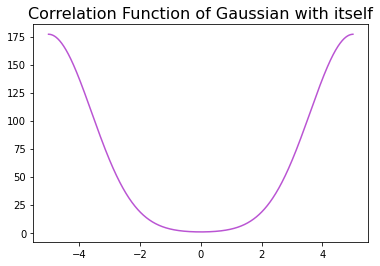

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def correlation(f, g):
    fft = np.fft.fft(f)
    gft = np.fft.fft(g)
    corrft = fft*np.conj(gft)
        #conjugate because we want the
        #correlation between f and g
    corr = np.fft.ifft(corrft)
    return corr

n = 1000
x = np.linspace(-5, 5, n)
y = np.exp(-0.5*x**2)
c = correlation(y, y)

plt.figure(figsize=(6,4))
plt.title("Correlation Function of Gaussian with itself", fontsize=16)
plt.plot(x,c, color='mediumorchid')
plt.show()

b)

C:\Users\adesr\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\adesr\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\adesr\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\adesr\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\adesr\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\adesr\anaco

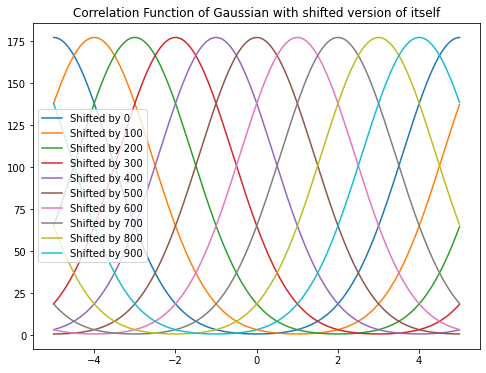

In [3]:
#combination of the shift and correlation functions
def corr_shift(f, shift):
    N = len(f)
    yft = np.fft.fft(f)
    k = np.arange(len(yft))
    r = np.exp(2*np.pi*1J*k*shift/N)
    yft_shift = yft*r
    corrft = yft*np.conj(yft_shift)
    corr = np.fft.ifft(corrft)
    return corr

n = 1000
x = np.linspace(-5, 5, n)
y = np.exp(-0.5*x**2)
c = corr_shift(y, n/2)

plt.figure(figsize=(8,6))
plt.title("Correlation Function of Gaussian with shifted version of itself", fontsize=12)
for i in range(10):
    plt.plot(x, corr_shift(y, i*100), label='Shifted by {}'.format(i*100))
    plt.legend()
plt.show()

How does the correlation function depend on the shift? 

The correlation of a gaussian with itself will simply give another gaussian, and as we can see from the plot above, the correlation of a gaussian with a shifted version of itself just shifts the gaussian resulting from the correlation. If we have 0 shift, the resulting gaussian from the correlation is split in half on each side of the range, whereas if we have a shift of N/2, the resulting gaussian is shifted to the middle of the range.

Does this surprise you?

No, this is what we should expect since correlating a gaussian with another gaussian that is shifted will necessarily shift the resulting gaussian from the correlation, and the amount of that shift is dependant on the amount we shift our original gaussian.

<div>
<img src="problems/3.png" width="600">
</div>

C:\Users\adesr\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


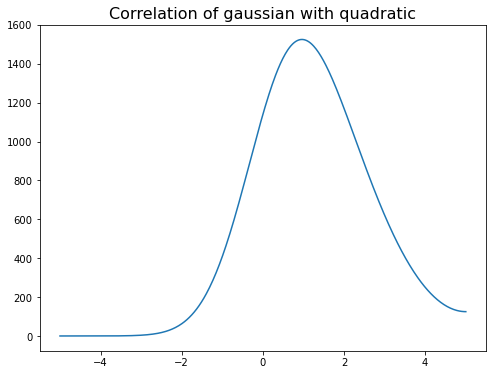

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor

def conv(f, g):
    zeros_fft = np.fft.fft(np.append(f,np.zeros(len(f))))
                        #adding zeros to the end of arrays
    zeros_gft = np.fft.fft(np.append(g,np.zeros(len(g))))
    conv = np.fft.ifft(zeros_fft*zeros_gft) #no complex
                            #conjugate because we're taking
                            #the convolution not correlation
    c = conv[:floor(len(conv)/2)] #we then need only take
                            #half of our convolution since
                            #we doubled the length of our f
                            #and g arrays by adding 0s
    return c

n = 1000
x = np.linspace(-5, 5, int(n/2))
x2 = np.linspace(-5, 5, n)
y = np.exp(-0.5*x**2)
y2 = x**2
c = conv(y, y2)

plt.figure(figsize=(8,6))
plt.plot(x,c)
plt.title('Correlation of gaussian with quadratic', fontsize=16)
plt.show()

<div>
<img src="problems/4.png" width="600">
</div>

a)

For geometric series, we know that the solution is:

$\sum_{x=0}^{N-1}ar^k = a(\frac{1-r^N}{1-r})$ for r≠1

So to apply it to our equation ($exp(-2\pi ikx/N)$), we have:

a = 1, r = $exp(-2\pi ik/N)$ and k = x, so we can solve:

$\sum_{x=0}^{N-1}exp(-2\pi ikx/N) = 1\cdot (\frac{1-exp(-2\pi ik/N)^N}{1-exp(-2\pi ik/N)}) = \frac{1-exp(-2\pi ik)}{1-exp(-2\pi ik/N)}$

b)

We can show that our sum approaches N as k approaches 0:

$\sum_{x=0}^{N-1}exp(-2\pi ikx/N) = \sum_{x=0}^{N-1}exp(-2\pi i\cdot 0 \cdot x/N) = \sum_{x=0}^{N-1}exp(0) = \sum_{x=0}^{N-1}1 = N$

c)

The DFT of some function f(x) is written as:

$\sum_{x=0}^{N-1}f(x)\cdot exp(-2\pi ikx/N)$

In our case, the function we want to use is a non integer sine wave, which can be written as: $sin(k_{ni}x) = \frac{exp(ik_{ni}x)-exp(-ik_{ni}x)}{2i}$, where $k_{ni}$ is a non-integer.

So our DFT becomes:

$\sum_{x=0}^{N-1}sin(k_{ni}x)\cdot exp(-2\pi ikx/N) = \sum_{x=0}^{N-1}(\frac{exp(ik_{ni}x)-exp(-ik_{ni}x)}{2i})\cdot exp(-2\pi ikx/N) = $

$\sum_{x=0}^{N-1}\frac{1}{2i}exp(ik_{ni}-2\pi ik/N)^x-\sum_{x=0}^{N-1}\frac{1}{2i}exp(-ik_{ni}-2\pi ik/N)^x$

Which by what we found in a), is equal to:

$\frac{1}{2i} \cdot \frac{1-exp(ik_{ni}N-2\pi ik)}{1-exp(ik_{ni}-2\pi ik/N)} - \frac{1}{2i} \cdot \frac{1-exp(-ik_{ni}N-2\pi ik)}{1-exp(-ik_{ni}-2\pi ik/N)}$

C:\Users\adesr\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\adesr\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


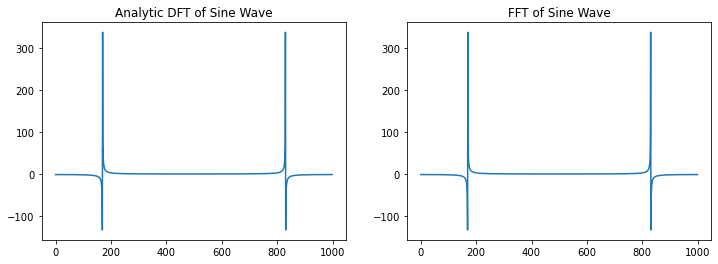

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def analytic_sine(kni, N):
    k = np.arange(N)
    analytic = (1/2J)*(1-np.exp(1J*kni*N-2*np.pi*1J*k))/(1-np.exp(1J*kni-2*np.pi*1J*k/N))-(1/2J)*(1-np.exp(-1J*kni*N-2*np.pi*1J*k))/(1-np.exp(-1J*kni-2*np.pi*1J*k/N))
    return analytic

k_ni = 11.5
n = 1000
x = np.arange(n)
y = analytic_sine(k_ni, n)
y2 = np.fft.fft(np.sin(k_ni*x))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Analytic DFT of Sine Wave')
plt.plot(y)
plt.subplot(1,2,2)
plt.title('FFT of Sine Wave')
plt.plot(y2)
plt.show()

Since we know that the fourier transform of a sine wave is a delta function, we can take the absolute value of our analytic DFT and our FFT to more closely resemble a delta function.

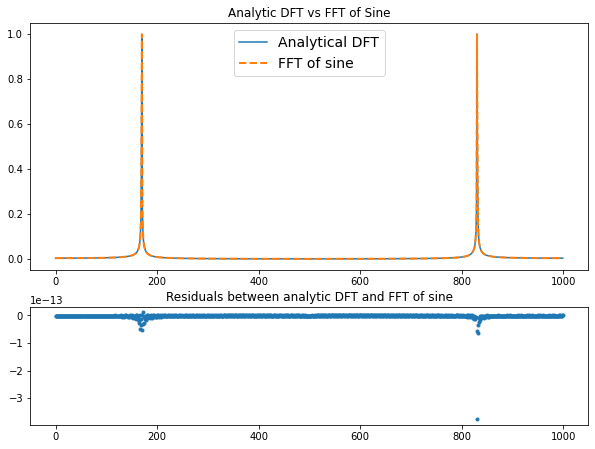

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Analytic DFT vs FFT of Sine')
plt.plot(abs(y)/max(abs(y)), label='Analytical DFT')
plt.plot(abs(y2)/max(abs(y2)), linestyle='--', linewidth=2, label='FFT of sine')
plt.legend(fontsize=14)
plt.subplot(4,1,3)
plt.title('Residuals between analytic DFT and FFT of sine')
plt.plot(abs(y)/max(abs(y))-abs(y2)/max(abs(y2)), '.')
plt.show()

Now we can see our Fourier transform resembles 2 delta functions, but the peaks are wider than a delta function, which is caused by spectral leakage. The residuals between the analytic DFT and FFT of sine show that the two methods agree to within machine precision.

d)

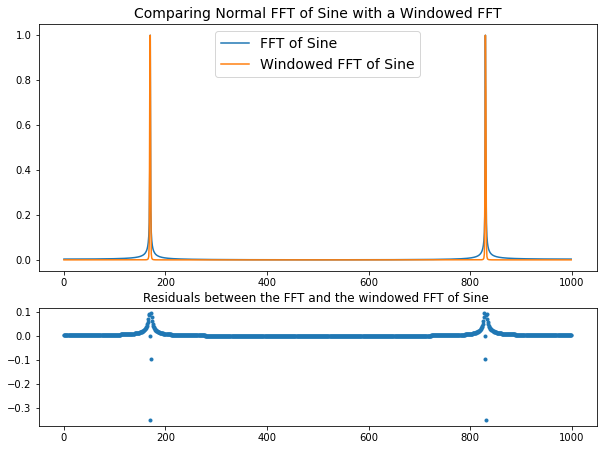

In [7]:
k_ni = 11.5
n = 1000
x = np.arange(n)
y = np.sin(k_ni*x)
window = 0.5-0.5*np.cos(2*np.pi*x/n)
y_window = y*window
yft = np.fft.fft(y)
yft_window = np.fft.fft(y_window)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Comparing Normal FFT of Sine with a Windowed FFT', fontsize=14)
plt.plot(abs(yft)/max(abs(yft)), label='FFT of Sine')
plt.plot(abs(yft_window)/max(abs(yft_window)), label='Windowed FFT of Sine')
plt.legend(fontsize=14)
plt.subplot(4,1,3)
plt.plot(abs(yft)/max(abs(yft))-abs(yft_window)/max(abs(yft_window)), '.')
plt.title('Residuals between the FFT and the windowed FFT of Sine ')
plt.show()

It's clear to see by the difference in widths of the peaks how much more the windowed function resembles a delta function than our normal FFT.

e)

At index 1 the FFT of the window function is equal to 500.0.
At index 2 the FFT of the window function is equal to -250.0.
At index 1000 the FFT of the window function is equal to -250.0.


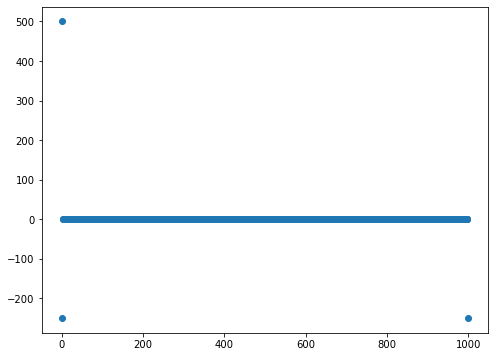

In [8]:
wft = np.fft.fft(window)

for i in range(len(wft)):
    if abs(wft[i].real)>1e-13:
        print('At index {} the FFT of the window function is equal to {}.'.format(i+1,wft[i].real))

plt.figure(figsize=(8,6))
plt.plot(wft.real, 'o')
plt.show()

As we can see from the plot above, the window function is equal to [500,-250,0...0,-250], which is [N/2,-N/4,0...0,-N/4] since our value for N in this case is 1000.

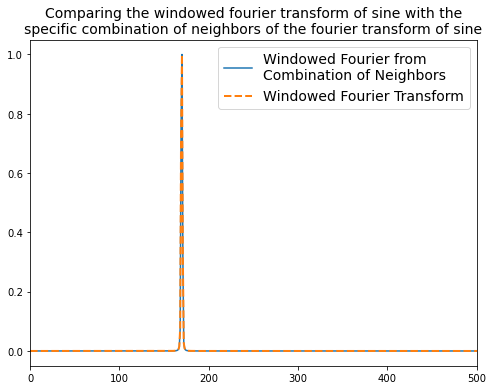

In [9]:
k_ni = 11.5
n = 1000
x = np.arange(n)
y = np.sin(k_ni*x)
yft = np.fft.fft(y)

win_four = np.copy(yft)
for i in range(n-1):
    #adding in the weights that we just determined,
    #i.e. [N/2,-N/4,0...0,-N/4]
    win_four[i] = (n/2)*yft[i]-(n/4)*yft[i+1]-(n/4)*yft[i-1]
win_four[-1] = (n/2)*yft[-1]-(n/4)*yft[0]-(n/4)*yft[-2]
    
plt.figure(figsize=(8,6))
plt.title('Comparing the windowed fourier transform of sine with the\nspecific combination of neighbors of the fourier transform of sine', fontsize=14)
plt.plot(abs(win_four)/max(abs(win_four)), label='Windowed Fourier from \nCombination of Neighbors')
plt.plot(abs(yft_window)/max(abs(yft_window)), linestyle='--', linewidth=2,label='Windowed Fourier Transform')
plt.xlim(0,500)
plt.legend(fontsize=14)
plt.show()

?<div>
<img src="problems/5.png" width="600">
</div>

Loading all the files and templates:

In [10]:
import h5py

def read_template(filename):
    dataFile=h5py.File(filename,'r')
    template=dataFile['template']
    tp=template[0]
    tx=template[1]
    return tp,tx
def read_file(filename):
    dataFile=h5py.File(filename,'r')
    dqInfo = dataFile['quality']['simple']
    qmask=dqInfo['DQmask'][...]

    meta=dataFile['meta']
    #gpsStart=meta['GPSstart'].value
    gpsStart=meta['GPSstart'][()]
    #print meta.keys()
    #utc=meta['UTCstart'].value
    utc=meta['UTCstart'][()]
    #duration=meta['Duration'].value
    duration=meta['Duration'][()]
    #strain=dataFile['strain']['Strain'].value
    strain=dataFile['strain']['Strain'][()]
    dt=(1.0*duration)/len(strain)

    dataFile.close()
    return strain,dt,utc

In [11]:
directory = 'ligo/'

Hanford_files = [0,0,0,0]
Livingston_files = [0,0,0,0]
templates = [0,0,0,0]

Hanford_files[0] = read_file('{}H-H1_LOSC_4_V1-1167559920-32.hdf5'.format(directory))
Hanford_files[1] = read_file('{}H-H1_LOSC_4_V2-1126259446-32.hdf5'.format(directory))
Hanford_files[2] = read_file('{}H-H1_LOSC_4_V2-1128678884-32.hdf5'.format(directory))
Hanford_files[3] = read_file('{}H-H1_LOSC_4_V2-1135136334-32.hdf5'.format(directory))

Livingston_files[0] = read_file('{}L-L1_LOSC_4_V1-1167559920-32.hdf5'.format(directory))
Livingston_files[1] = read_file('{}L-L1_LOSC_4_V2-1126259446-32.hdf5'.format(directory))
Livingston_files[2] = read_file('{}L-L1_LOSC_4_V2-1128678884-32.hdf5'.format(directory))
Livingston_files[3] = read_file('{}L-L1_LOSC_4_V2-1135136334-32.hdf5'.format(directory))

templates[0] = read_template('{}GW150914_4_template.hdf5'.format(directory))
templates[1] = read_template('{}GW151226_4_template.hdf5'.format(directory))
templates[2] = read_template('{}GW170104_4_template.hdf5'.format(directory))
templates[3] = read_template('{}LVT151012_4_template.hdf5'.format(directory))

print(templates[0])

(array([5.5410477e-20, 5.4439373e-20, 5.3463174e-20, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32), array([1.00204446e-19, 1.00735800e-19, 1.01257744e-19, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00], dtype=float32))


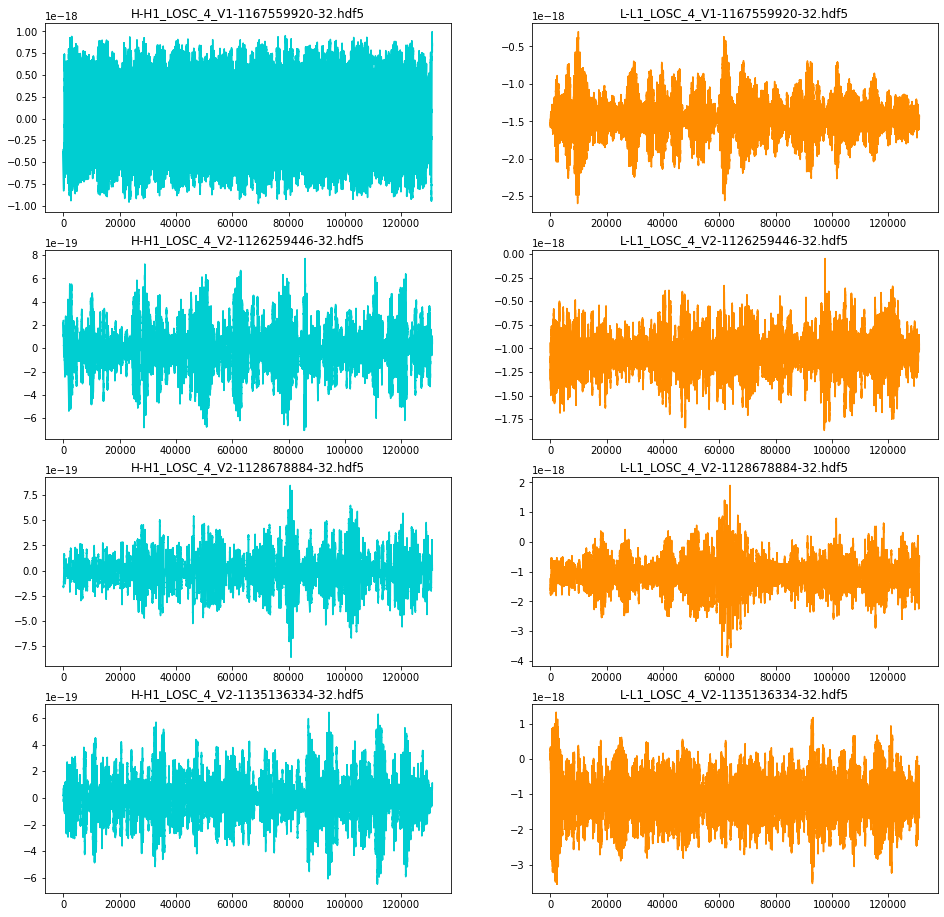

In [12]:
import numpy as np
import matplotlib.pyplot as plt

Hanford_names = ['H-H1_LOSC_4_V1-1167559920-32.hdf5', 'H-H1_LOSC_4_V2-1126259446-32.hdf5', 'H-H1_LOSC_4_V2-1128678884-32.hdf5', 'H-H1_LOSC_4_V2-1135136334-32.hdf5']
Livingston_names = ['L-L1_LOSC_4_V1-1167559920-32.hdf5', 'L-L1_LOSC_4_V2-1126259446-32.hdf5', 'L-L1_LOSC_4_V2-1128678884-32.hdf5', 'L-L1_LOSC_4_V2-1135136334-32.hdf5']

plt.figure(figsize=(16,16))

for i in range(4):
    strain, dt, utc = Hanford_files[i]
    plt.subplot(4,2,2*i+1)
    plt.plot(strain, color='darkturquoise')
    plt.title(Hanford_names[i])
for i in range(4):
    strain, dt, utc = Livingston_files[i]
    plt.subplot(4,2,2*i+2)
    plt.plot(strain, color='darkorange')
    plt.title(Livingston_names[i])

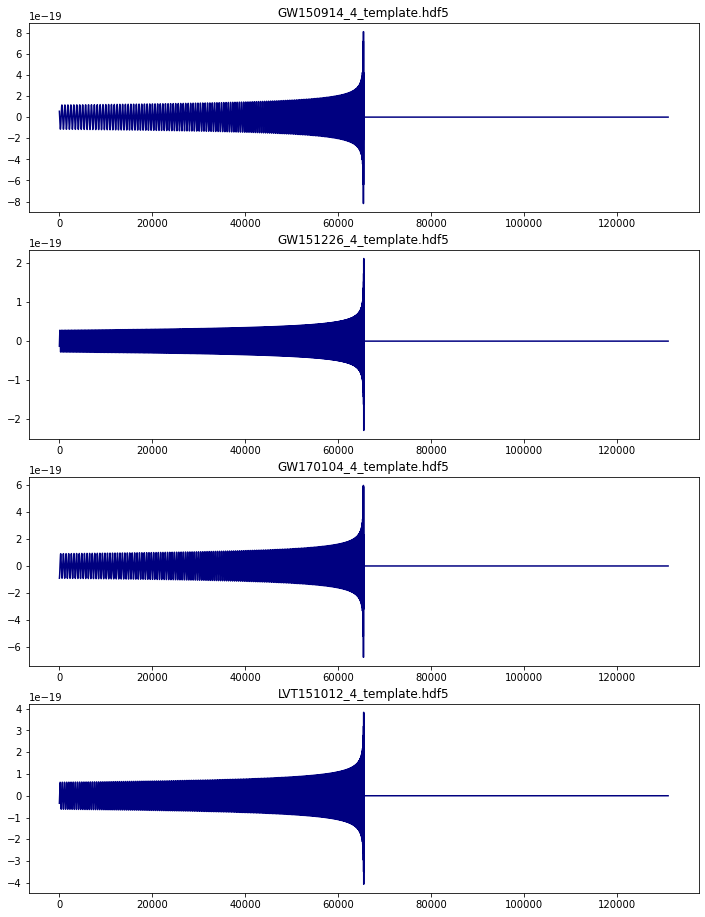

In [13]:
template_names = ['GW150914_4_template.hdf5', 'GW151226_4_template.hdf5', 'GW170104_4_template.hdf5', 'LVT151012_4_template.hdf5']

plt.figure(figsize=(12,16))

for i in range(4):
    tp, tx = templates[i]
    plt.subplot(4,1,i+1)
    plt.plot(tp, color='navy')
    plt.title(template_names[i])

a)

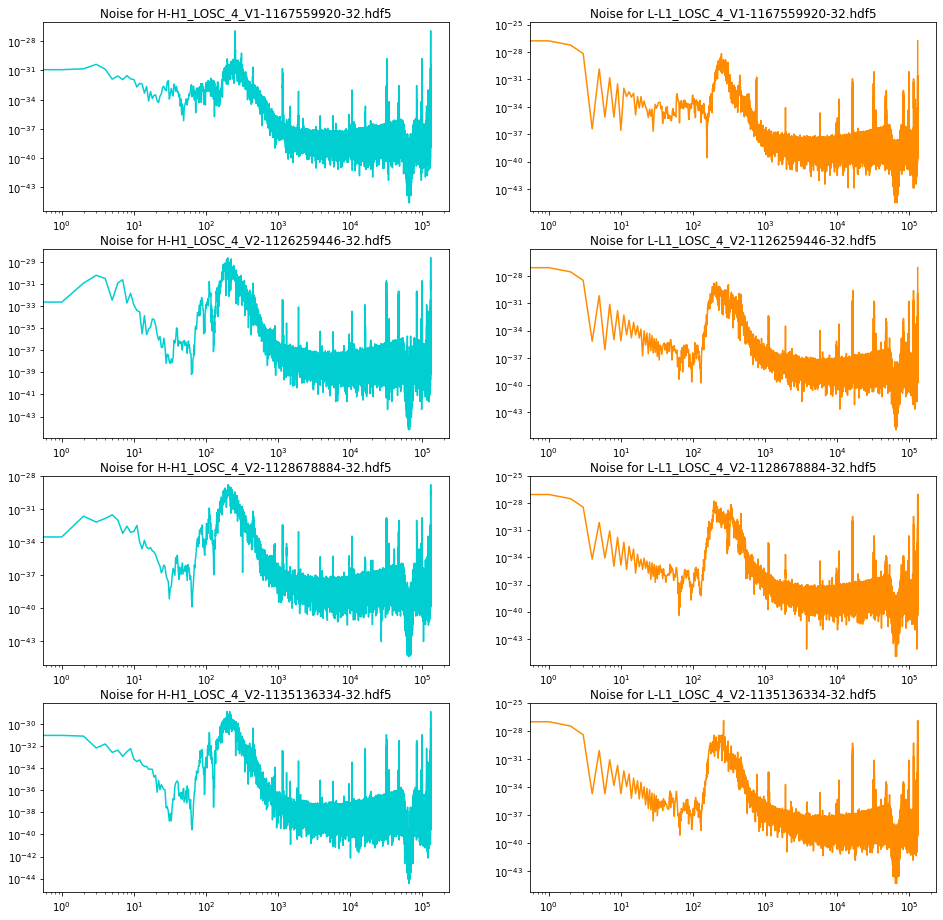

In [14]:
import scipy.signal.windows as win

Hanford_noises = [0,0,0,0]
Livingston_noises = [0,0,0,0]

plt.figure(figsize=(16,16))
for i in range(4):
    strain, dt, utc = Hanford_files[i]
    window = win.tukey(len(strain))
    #tukey is a window function that is 
    #flat in the middle
    noise_ft = np.fft.fft(window*strain)
    Hanford_noises[i] = np.abs(noise_ft)**2
    plt.subplot(4,2,2*i+1)
    plt.loglog(Hanford_noises[i], color='darkturquoise')
    plt.title('Noise for '+Hanford_names[i])
for i in range(4):
    strain, dt, utc = Livingston_files[i]
    window = win.tukey(len(strain))
    noise_ft = np.fft.fft(window*strain)
    Livingston_noises[i] = np.abs(noise_ft)**2
    plt.subplot(4,2,2*i+2)
    plt.loglog(Livingston_noises[i], color='darkorange')
    plt.title('Noise for '+Livingston_names[i])

We estimate the noise to simply be the square of the input for each event. This comes from the fact that our detector is almost only outputting noise throughout the event since the gravitational wave detection is so short. We can then average over the 4 events we have for each detector to get an accurate noise model, which can be seen below. 

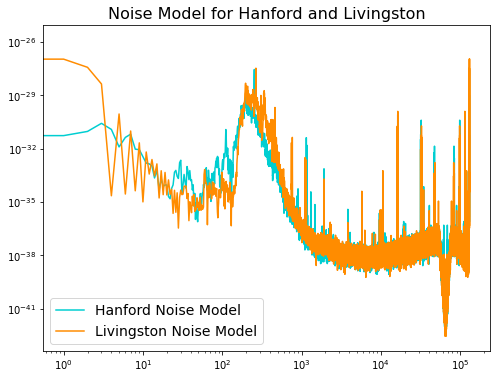

In [15]:
#averaging over the noise for the 4 instances
Hanford_noise = np.mean(Hanford_noises, axis=0)
Livingston_noise = np.mean(Livingston_noises, axis=0)

plt.figure(figsize=(8,6))
plt.title('Noise Model for Hanford and Livingston', fontsize=16)
plt.loglog(Hanford_noise, color='darkturquoise', label='Hanford Noise Model')
plt.loglog(Livingston_noise, color='darkorange', label='Livingston Noise Model')
plt.legend(fontsize=14)
plt.show()

We then need to smooth our noise input, which can be done by convolving the noise with a gaussian kernel which helps us get rid of a lot of our spikes in the noise, effectively dampening out the small fluxuations.

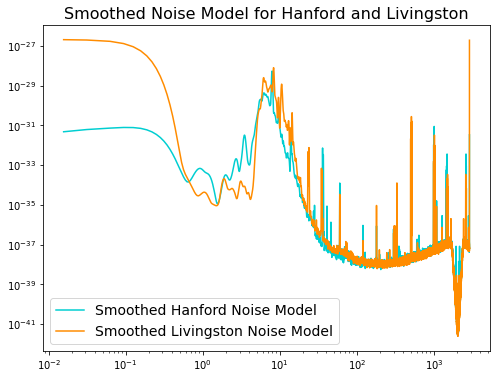

In [16]:
def smooth_vector(vec,sig):
    n=len(vec)
    x=np.arange(n)
    x[n//2:]=x[n//2:]-n
    kernel=np.exp(-0.5*x**2/sig**2) #make a Gaussian kernel
    kernel=kernel/kernel.sum()
    vecft=np.fft.rfft(vec)
    kernelft=np.fft.rfft(kernel)
    vec_smooth=np.fft.irfft(vecft*kernelft) #convolve the data with the kernel
    return vec_smooth

sigma = 3
Hanford_smooth = smooth_vector(np.abs(Hanford_noise)[:-38392], sigma)
                                #Have to remove some of the noise model
                                #from the end to avoid the sum in the
                                #smooth_vector function to go to inf
Livingston_smooth = smooth_vector(np.abs(Livingston_noise)[:-38392], sigma)

tobs=dt*len(strain)
dnu=1/tobs
nu=np.arange(len(Hanford_smooth))*dnu
nu[0]=0.5*nu[1]

Hanford_Ninv=1/Hanford_smooth
Hanford_Ninv[nu>1500]=0
Hanford_Ninv[nu<20]=0

Livingston_Ninv=1/Livingston_smooth
Livingston_Ninv[nu>1500]=0
Livingston_Ninv[nu<20]=0

plt.figure(figsize=(8,6))
plt.title('Smoothed Noise Model for Hanford and Livingston', fontsize=16)
plt.loglog(nu,np.abs(Hanford_smooth), color='darkturquoise', label='Smoothed Hanford Noise Model')
plt.loglog(nu,np.abs(Livingston_smooth), color='darkorange', label='Smoothed Livingston Noise Model')
plt.legend(fontsize=14)
plt.show()

b)

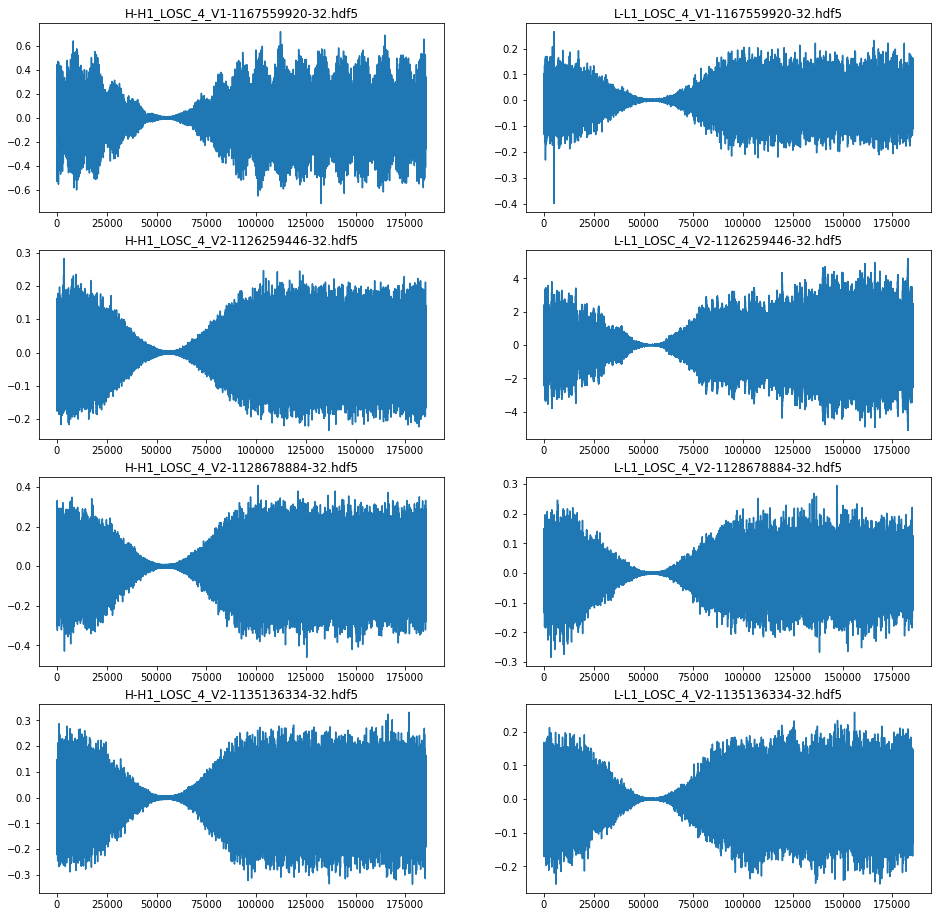

In [17]:

plt.figure(figsize=(16,16))
for i in range(4):
    strain, dt, utc = Hanford_files[i]
    tp, tx = templates[i]

    strain = strain[:-38392]
    tp = tp[:-38392]
    
    window = win.tukey(len(strain))
    template_ft=np.fft.fft(tp*window)
    template_filt=template_ft*Hanford_Ninv
    data_ft=np.fft.fft(strain*window)
    rhs=np.fft.irfft(data_ft*np.conj(template_filt))
    plt.subplot(4,2,2*i+1)
    plt.plot(rhs)
    plt.title(Hanford_names[i])
    
for i in range(4):
    strain, dt, utc = Livingston_files[i]
    tp, tx = templates[i]

    strain = strain[:-38392]
    tp = tp[:-38392]
    
    window = win.tukey(len(strain))
    template_ft=np.fft.fft(tp*window)
    template_filt=template_ft*Livingston_Ninv
    data_ft=np.fft.fft(strain*window)
    rhs=np.fft.irfft(data_ft*np.conj(template_filt))
    plt.subplot(4,2,2*i+2)
    plt.plot(rhs)
    plt.title(Livingston_names[i])

plt.show()

I think the detection isn't working because the gravitational wave was measured in the chunck of data that I got rid of, but I'm not sure how to keep that section of data without the smoothing function not working.